In [1]:
import pandas as pd
import statistics

from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('survey_results_public.csv')

In [3]:
df.shape

(64461, 61)

In [4]:
df.keys()

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

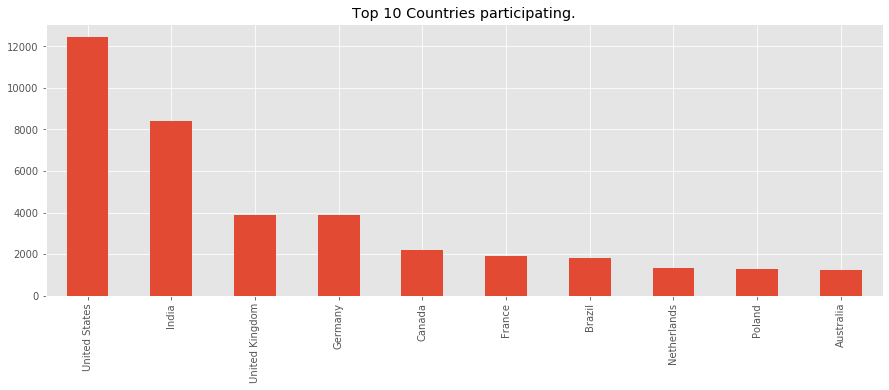

In [5]:
df.Country.value_counts().head(10).plot(kind='bar', figsize =(15,5), title="Top 10 Countries participating.")

In [6]:
naija = df[df['Country'] == 'Nigeria'].reset_index(drop=True)

In [7]:
naija.keys()

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [8]:
age1stcode = [int(line) for line in naija.Age1stCode.tolist() if type(line) == str]
print(f"Average age at first code for Nigerians is {round(statistics.mean(age1stcode),1)} Years.")

Average age at first code for Nigerians is 19.9 Years.


In [9]:
ages = []
for line in naija.Age:
    try:
        x = int(line)
        ages.append(x)
    except:
        pass
    
print(f"Average age of Nigerian devs is {round(statistics.mean(ages),1)} Years.")

Average age of Nigerian devs is 25.7 Years.


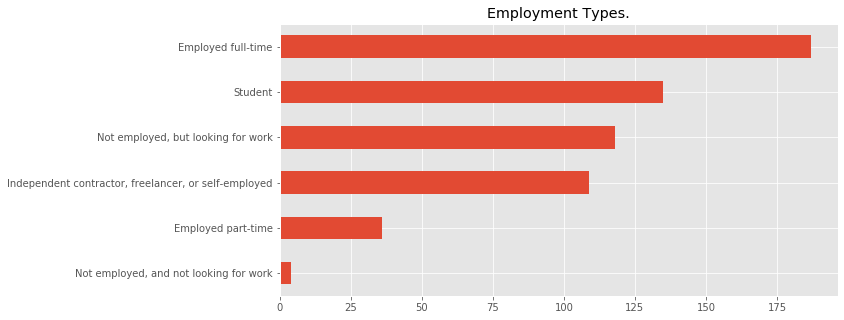

In [10]:
naija.Employment.value_counts().sort_values().plot(kind='barh', figsize =(10,5), title="Employment Types.")

In [11]:
male, female, none_ind = 0, 0, 0
for line in naija.Gender:
    if line == 'Woman':
        female += 1
    elif line == 'Man':
        male += 1
    else:
        none_ind += 1
        
male, female, none_ind

(408, 31, 154)

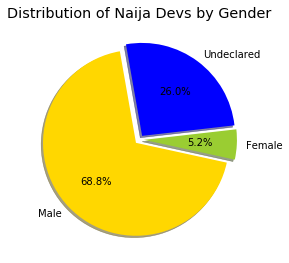

In [12]:
# Data to plot
labels = ['Male', 'Female', 'Undeclared']
sizes = [male, female, none_ind]
colors = ['gold', 'yellowgreen', 'blue']
explode = (0.05, 0.05, 0.05)  # explode 1st slice

# Plot
# patches, texts = plt.pie(sizes, explode=explode, autopct='%1.2f%%', colors=colors,shadow=True, startangle=120)
plt.title("Distribution of Naija Devs by Gender")
plt.tight_layout()

# Plot with labels and percentage
plt.pie(sizes, labels=labels,autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=100)
plt.show()

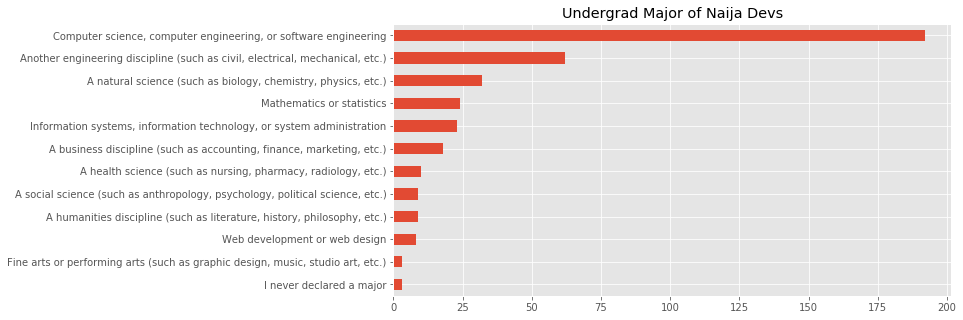

In [13]:
naija.UndergradMajor.value_counts().sort_values().plot(kind='barh', figsize =(10,5), title="Undergrad Major of Naija Devs")

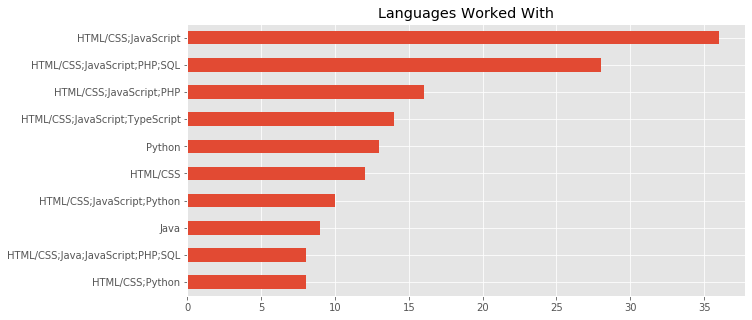

In [14]:
naija.LanguageWorkedWith.value_counts().head(10).sort_values().plot(kind='barh', figsize =(10,5), title="Languages Worked With")

In [15]:
undec = 0
no_lang = []
for line in naija.LanguageWorkedWith:
    try:
        x = line.split(';')
        no_lang.append(len(x))
    except:
        undec += 1
undec

87

In [16]:
print(f"Average number lang a Naija dev has worked with {round(sum(no_lang)/len(no_lang))}")

Average number lang a Naija dev has worked with 4


In [17]:
expe = []
for item in naija.YearsCode.tolist():
    try:
        x = int(item)
        expe.append(x)
    except:
        if line == 'Less than 1 year':
            expe.append(1)
            
print(f"Average years of experience of Naija Devs is {round(sum(expe)/len(expe),1)}")

Average years of experience of Naija Devs is 5.7


In [35]:
naija[(naija['Age'] < 25) & (naija['Gender'] == 'Woman' ) & (naija['CompTotal'] > 0 )]#['MainBranch']

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
309,50414,I am a developer by profession,Yes,23.0,21,Monthly,210000.0,6912.0,Nigeria,Nigerian naira,...,Easy,Appropriate in length,No,Mathematics or statistics,Gatsby;Ruby on Rails,Express;Flask;React.js,A lot more welcome now than last year,40.0,2,1


In [29]:
naija.Hobbyist.value_counts()

Yes    475
No     118
Name: Hobbyist, dtype: int64

In [41]:
x = sum([line for line in naija.CompTotal if line > 0])/len([line for line in naija.CompTotal if line > 0])
print(f"Average earned by Naija dev who gets paid is {round(x,2):,} per annum")

Average earned by Naija dev who gets paid is 2,631,469.99 per annum


In [45]:
f"{max([line for line in naija.CompTotal if line > 0]):,}"

'200,000,000.0'

In [46]:
f"{min([line for line in naija.CompTotal if line > 0]):,}"

'200.0'

In [49]:
langs = [line for line in naija.LanguageWorkedWith if type(line) != float]

In [53]:
langss = {}
for line in langs:
    x = line.split(';')
    for item in x:
        if item in langss.keys():
            langss[item] += 1
        else:
            langss[item] = 1

In [54]:
langss

{'C#': 100,
 'JavaScript': 366,
 'TypeScript': 86,
 'Bash/Shell/PowerShell': 38,
 'C': 52,
 'C++': 74,
 'HTML/CSS': 395,
 'Java': 174,
 'Objective-C': 5,
 'Perl': 4,
 'PHP': 218,
 'Python': 192,
 'R': 15,
 'Scala': 2,
 'SQL': 242,
 'Swift': 10,
 'VBA': 23,
 'Ruby': 12,
 'Go': 15,
 'Rust': 5,
 'Kotlin': 30,
 'Assembly': 14,
 'Dart': 37,
 'Haskell': 3}

In [57]:
dict2pd = {}
for i, j in langss.items():
    dict2pd[i] = [j]

df0 = pd.DataFrame.from_dict(dict2pd)

In [76]:
df_now = df0.T
# df_now.columns = ['lang', 'count']
df_now = df_now.reset_index()
df_now.columns = ['lang', 'count']
df_now.sort_values('count', ascending=False).head(10)

,lang,count
6,HTML/CSS,395
1,JavaScript,366
14,SQL,242
10,PHP,218
11,Python,192
7,Java,174
0,C#,100
2,TypeScript,86
5,C++,74
4,C,52


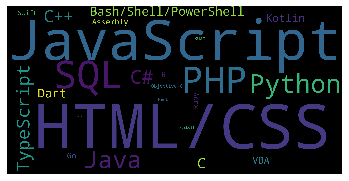

In [55]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="black",width=2000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(langss)
plt.axis('off')
plt.imshow(wc)